In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


años = [2024,2023,2022,2021,2020,2019,2018,2017,2016]

def filtrar_datos(df_data,año_contrato,año_estadisticas):
    df_nuevo = df_data.copy()
    df_correlacion = df_nuevo.loc[:,'Contrato {}'.format(año_contrato)]
    df_año_estadisticas = df_nuevo.filter(like= str(año_estadisticas))
    df_año_estadisticas.drop(columns = 'Contrato {}'.format(año_estadisticas), inplace = True)
    df_año_estadisticas.drop(columns = 'Equipo {}'.format(año_estadisticas), inplace = True)
    df_correlacion = pd.concat([df_correlacion, df_año_estadisticas],axis = 1)
    return df_correlacion

def graficar_todos_dispersion(dato_interes, df):
  contrato = df.filter(like= 'Contrato').drop(columns='Contrato 2016')
  contrato = contrato.stack(dropna=False).reset_index(drop=True)

  estadistica = df.filter(like= dato_interes).drop(columns='{} 2024'.format(dato_interes))
  estadistica = estadistica.stack(dropna=False).reset_index(drop=True)

  # Gráfico de dispersión entre estadísticas y contrato
  plt.scatter(estadistica, contrato, s = 20, c = 'red')
  plt.title('{} vs. contrato'.format(dato_interes))
  plt.xlabel("{}".format(dato_interes))
  plt.ylabel("Valor contrato")

  # Agregar una cuadrícula
  plt.grid(True)

  # Mostrar la gráfica
  plt.show()

def seleccionar_todos_dispersion(dato_interes, df):
  contrato = df.filter(like= 'Contrato').drop(columns='Contrato 2016')
  contrato = contrato.stack(dropna=False).reset_index(drop=True)

  estadistica = df.filter(like= dato_interes).drop(columns='{} 2024'.format(dato_interes))

  estadistica = estadistica.stack(dropna=False).reset_index(drop=True)

  return estadistica, contrato


df = pd.read_csv('datos_completos_2023_2016.csv')
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace('\t', ' ')


Se procede a limpiar la data para solo tener los valores de cambios de precio en contrato y las estadisticas previas a dicho cambio.


In [3]:
import numpy as np

#Se limpia los datos para solo tener los contratos que varian

nuevo_dataset = {'RANK' : [], 'AGE': [], 'GP': [], 'W': [], 'L': [], 'MIN': [], 'PTS': [], 'FGM': [], 'FGA': [], 'FG%': [], '3PM': [], '3PA': [], '3P%': [],
                  'FTM': [], 'FTA': [], 'FT%': [], 'OREB': [], 'DREB': [], 'REB': [], 'AST': [], 'TOV': [], 'STL': [], 'BLK': [], 'PF': [], 'FP': [], 'DD2': [],'TD3': [], '+/-': []}

df_contratos_diferentes = df.copy()
df_contratos = df.filter(like='Contrato')
df_contratos_colums = df_contratos.columns

for player in df['Nombre']:
    for i in range(len(años) - 2):
      if df.loc[df['Nombre'] == player, df_contratos_colums[i]].iloc[0] == df.loc[df['Nombre'] == player, df_contratos_colums[i + 1]].iloc[0]:
        df_contratos_diferentes.loc[df['Nombre'] == player, df_contratos_colums[i]] = np.nan
        for dato in nuevo_dataset.keys():
          df_contratos_diferentes.loc[df['Nombre'] == player, '{} {}'.format(dato,años[i+1])] = np.nan

df_contratos_diferentes.to_csv('datos_contratos_diferentes.csv')

Una vez teniendo estos datos de contratos diferentes, se procede a evaluar la correlacion de las estadisticas con los contratos por cada año.

In [4]:
for i in range(len(años) - 1):
    df_correlacion_diferentes = filtrar_datos(df_contratos_diferentes,años[i],años[i + 1])
    correlacion = df_correlacion_diferentes.corr()
    i_correlacion_diferentes = correlacion.iloc[0].sort_values(ascending=False)
    i_correlacion_diferentes.index = i_correlacion_diferentes.index.str.replace(str(años[i + 1]), '')
    if i == 0:
        contrato_correlacion_diferentes = i_correlacion_diferentes
    else:
        contrato_correlacion_diferentes = pd.concat([contrato_correlacion_diferentes,i_correlacion_diferentes],axis = 1)

contrato_correlacion_diferentes.to_csv('Correlacion_contrato_diferentes.csv')
contrato_correlacion_diferentes.style.background_gradient(cmap='coolwarm', axis=None).format(precision=2)

<ipython-input-2-9befc654c446>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_año_estadisticas.drop(columns = 'Contrato {}'.format(año_estadisticas), inplace = True)
<ipython-input-2-9befc654c446>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_año_estadisticas.drop(columns = 'Equipo {}'.format(año_estadisticas), inplace = True)
<ipython-input-2-9befc654c446>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_año_estadisti

,Contrato 2024,Contrato 2023,Contrato 2022,Contrato 2021,Contrato 2020,Contrato 2019,Contrato 2018,Contrato 2017
Contrato 2024,1.00,nan,nan,nan,nan,nan,nan,nan
3PM,0.59,0.34,0.15,0.07,0.52,0.42,0.12,-0.48
3PA,0.54,0.36,0.14,0.07,0.57,0.40,0.03,-0.39
PTS,0.47,0.54,0.64,0.62,0.82,0.34,0.63,-0.42
FGA,0.46,0.58,0.57,0.61,0.78,0.40,0.64,-0.40
MIN,0.46,0.51,0.58,0.57,0.72,0.43,0.61,-0.52
TOV,0.45,0.48,0.49,0.47,0.35,0.39,0.43,0.59
FP,0.44,0.54,0.62,0.65,0.78,0.32,0.65,-0.11
FGM,0.44,0.53,0.64,0.66,0.77,0.33,0.60,-0.33
FTM,0.38,0.40,0.60,0.55,0.82,0.28,0.61,-0.18


Se proceden a graficar los datos con correlacion mayor a traves de los años, comenzando con los PTS:

<ipython-input-5-f522ea2badfb>:19: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  contrato = contrato.stack(dropna=False).reset_index(drop=True)
<ipython-input-5-f522ea2badfb>:22: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  estadistica = estadistica.stack(dropna=False).reset_index(drop=True)


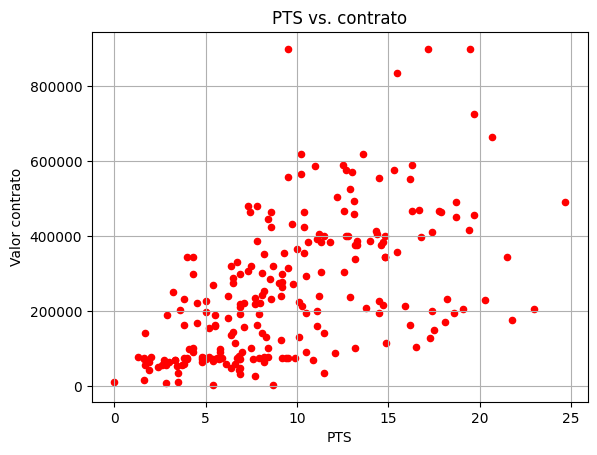

In [6]:
graficar_todos_dispersion('PTS', df_contratos_diferentes)

Se realiza el grafico correspondiente

<ipython-input-5-f522ea2badfb>:19: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  contrato = contrato.stack(dropna=False).reset_index(drop=True)
<ipython-input-5-f522ea2badfb>:22: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  estadistica = estadistica.stack(dropna=False).reset_index(drop=True)


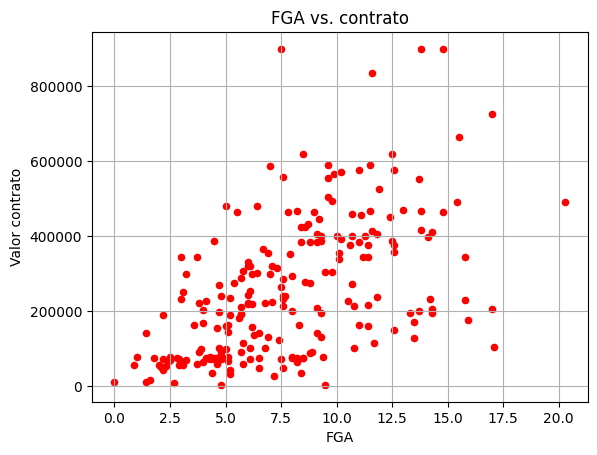

In [7]:
graficar_todos_dispersion('FGA', df_contratos_diferentes)

<ipython-input-5-f522ea2badfb>:19: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  contrato = contrato.stack(dropna=False).reset_index(drop=True)
<ipython-input-5-f522ea2badfb>:22: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  estadistica = estadistica.stack(dropna=False).reset_index(drop=True)


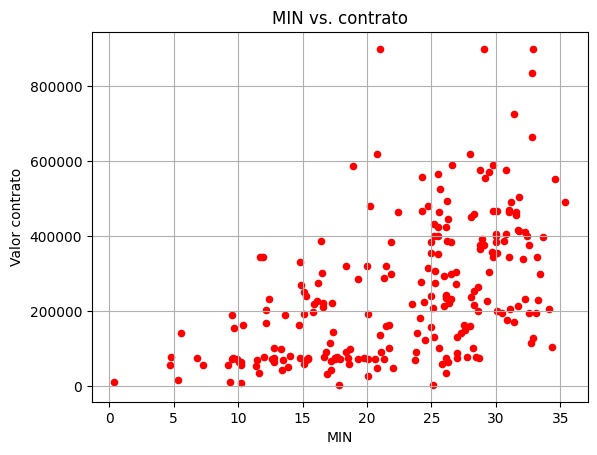

In [8]:
graficar_todos_dispersion('MIN', df_contratos_diferentes)

<ipython-input-5-f522ea2badfb>:19: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  contrato = contrato.stack(dropna=False).reset_index(drop=True)
<ipython-input-5-f522ea2badfb>:22: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  estadistica = estadistica.stack(dropna=False).reset_index(drop=True)


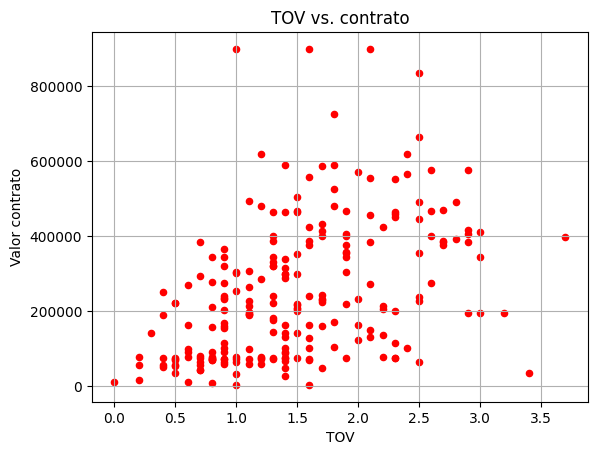

In [9]:
graficar_todos_dispersion('TOV', df_contratos_diferentes)

<ipython-input-5-f522ea2badfb>:19: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  contrato = contrato.stack(dropna=False).reset_index(drop=True)
<ipython-input-5-f522ea2badfb>:22: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  estadistica = estadistica.stack(dropna=False).reset_index(drop=True)


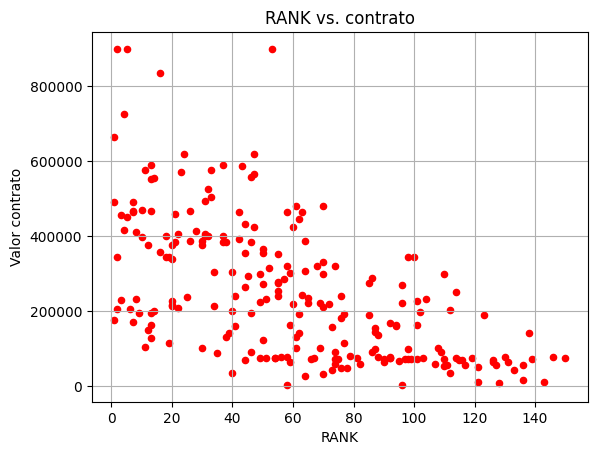

In [10]:
graficar_todos_dispersion('RANK', df_contratos_diferentes)

<ipython-input-5-f522ea2badfb>:19: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  contrato = contrato.stack(dropna=False).reset_index(drop=True)
<ipython-input-5-f522ea2badfb>:22: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  estadistica = estadistica.stack(dropna=False).reset_index(drop=True)


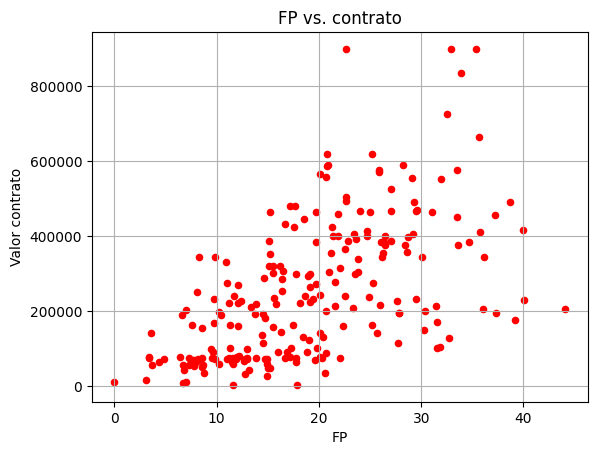

In [11]:
graficar_todos_dispersion('FP', df_contratos_diferentes)

<ipython-input-5-f522ea2badfb>:19: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  contrato = contrato.stack(dropna=False).reset_index(drop=True)
<ipython-input-5-f522ea2badfb>:22: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  estadistica = estadistica.stack(dropna=False).reset_index(drop=True)


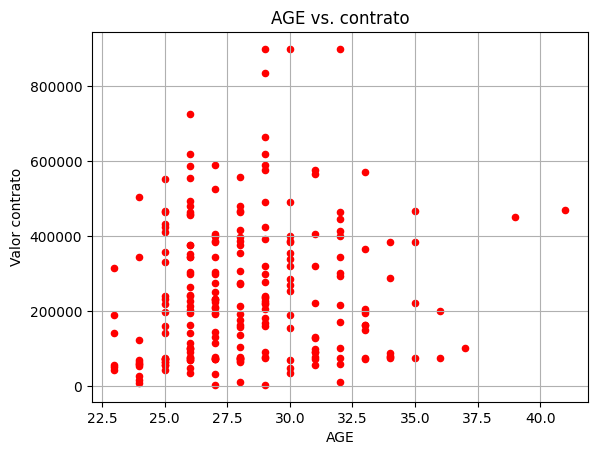

In [12]:
graficar_todos_dispersion('AGE', df_contratos_diferentes)

<ipython-input-5-f522ea2badfb>:19: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  contrato = contrato.stack(dropna=False).reset_index(drop=True)
<ipython-input-5-f522ea2badfb>:22: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  estadistica = estadistica.stack(dropna=False).reset_index(drop=True)


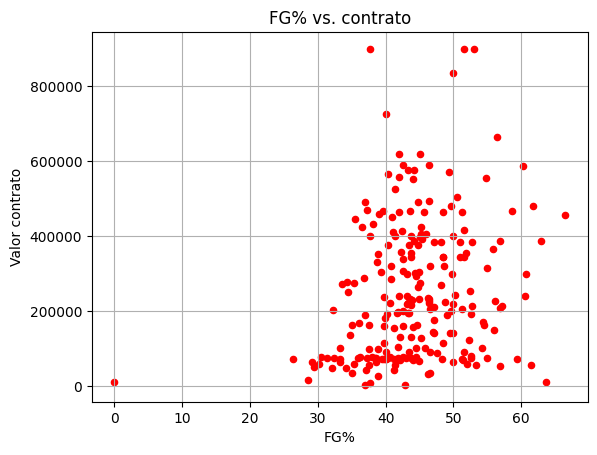

In [13]:
graficar_todos_dispersion('FG%', df_contratos_diferentes)

<ipython-input-5-f522ea2badfb>:19: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  contrato = contrato.stack(dropna=False).reset_index(drop=True)
<ipython-input-5-f522ea2badfb>:22: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  estadistica = estadistica.stack(dropna=False).reset_index(drop=True)


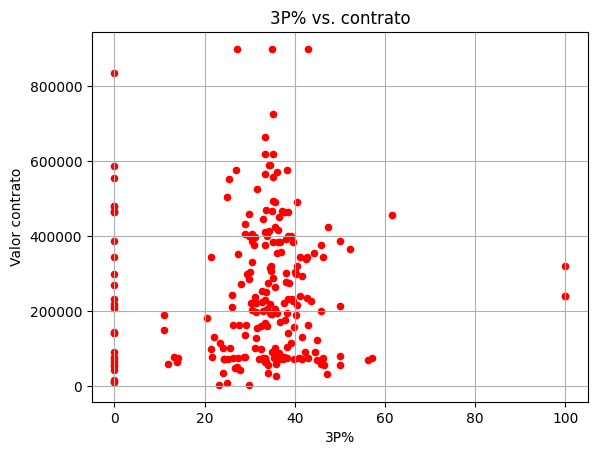

In [14]:
graficar_todos_dispersion('3P%', df_contratos_diferentes)

<ipython-input-15-b9c48a36ce2c>:38: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  contrato = contrato.stack(dropna=False).reset_index(drop=True)
<ipython-input-15-b9c48a36ce2c>:42: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  estadistica = estadistica.stack(dropna=False).reset_index(drop=True)
<ipython-input-15-b9c48a36ce2c>:38: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence th

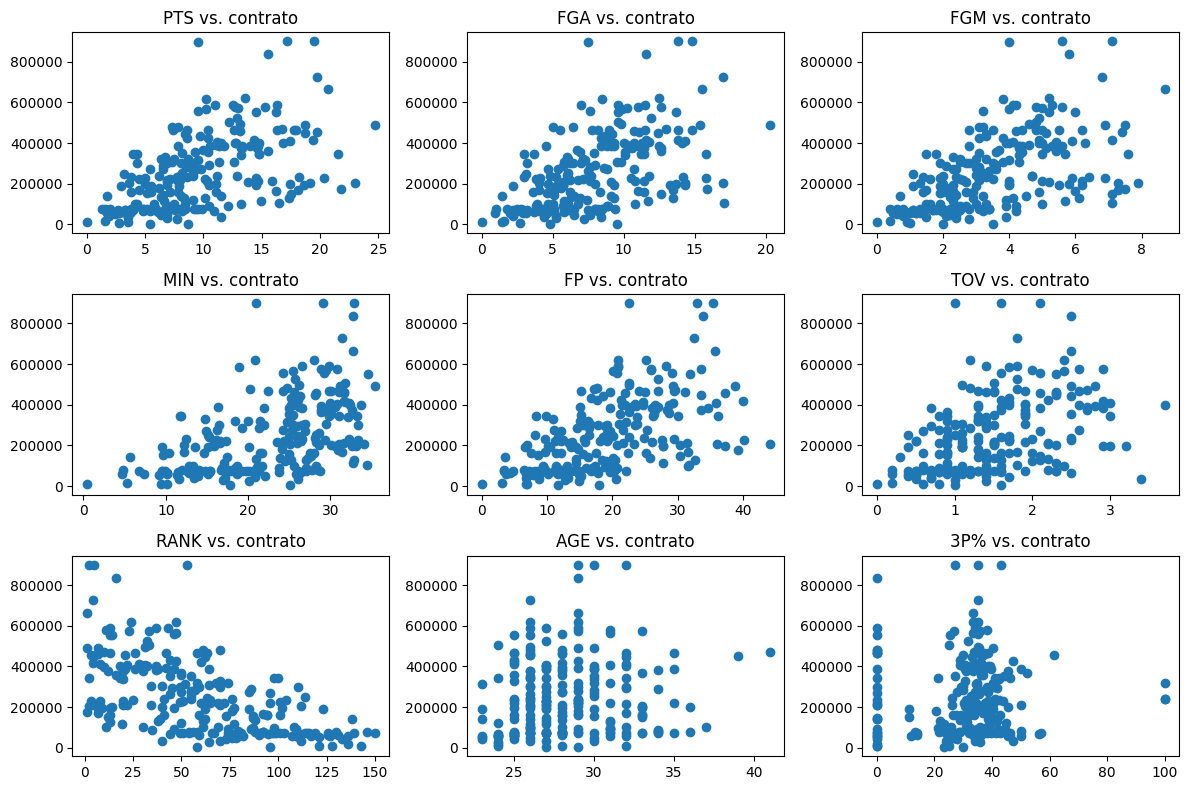

In [16]:
fig, axes = plt.subplots(3, 3, figsize=(12, 8))
#Grafica 1

datos_graficar = ['PTS', 'FGA', 'FGM', 'MIN','FP','TOV', 'RANK', 'AGE', '3P%']
for i in range(len(datos_graficar)):
  x, y = seleccionar_todos_dispersion(datos_graficar[i], df_contratos_diferentes)
  if i < 3:
    axes[0,i].scatter(x, y)
    axes[0,i].set_title('{} vs. contrato'.format(datos_graficar[i]))
  elif i >= 3 and i < 6:
    axes[1,i - 3].scatter(x, y)
    axes[1,i - 3].set_title('{} vs. contrato'.format(datos_graficar[i]))
  else:
    axes[2,i - 6].scatter(x, y)
    axes[2,i - 6].set_title('{} vs. contrato'.format(datos_graficar[i]))
plt.tight_layout()
plt.show()